In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
TENTATIVES=6

In [2]:
data=[]
for eps in [0.04, 0.07, 0.1, 0.15, 0.2, 0.25]:
    for fraction in  [0.04, 0.07, 0.1, 0.15, 0.2, 0.25]:
        for noise in [0,1]:
            data.append([eps,fraction,noise,0,0,0,0,0,0])

In [3]:
#order of labels in list 'log'
labels=["eps","fraction","noise","mean max reward","std max reward","steps to converge","","",""]
label_dict={"eps":0,"fraction":1,"noise":2,"mean max reward":3,"std max reward":4,"steps to converge":5,}
#In the order of labels, ex. possible_values[0] corresponds to values of eps
possible_values=[[0.04, 0.07, 0.1, 0.15, 0.2, 0.25],[0.04, 0.07, 0.1, 0.15, 0.2, 0.25],[0,1]]



In [4]:
def filterdata(data,Filter):
    filtered_data=[]
    for row in data:
        b_append=True
        for k,v in Filter.items():
            key=label_dict[k]
            for vv in v:
                if abs(row[key] - vv)>0.001:
                    b_append=False
        if b_append==True:
            filtered_data.append(row)
    return filtered_data

In [5]:
def plot(data,xlabel,ylabel,zlabel=None,Filter=None,Type=None):

    
    xlabel=label_dict[xlabel]
    ylabel=label_dict[ylabel]
    if zlabel!=None:
        zlabel=label_dict[zlabel]
   
    plt.figure()
    plt.ylabel(labels[ylabel])
    plt.xlabel(labels[xlabel])
    
    if Filter == None:
        filtered_data=data
        plt.title(labels[ylabel]+' - '+labels[xlabel])
    else:
        filtered_data=filterdata(data,Filter)
        title=labels[ylabel]+' - '+labels[xlabel]+', '
        for k,v in Filter.items():
            
            title=title+str(k)+'='+str(v)
        plt.title(title)
  
 

    
    if zlabel==None:
        dt={}
        x=[]
        y_mean=[]
        y_max=[]
        y_min=[]
        for i in range (0,len(filtered_data),1):
            y_value=filtered_data[i][ylabel]
            x_value=filtered_data[i][xlabel]
            if x_value in dt:
                dt[x_value].append(y_value)
            else:
                temp=[]
                temp.append(y_value)
                dt[x_value]=temp
        for k,v in dt.items():
            x.append(k)
            vnp=np.array(v).astype(np.float32)
            y_mean.append(np.median(vnp))
            y_max.append(np.max(vnp))
            y_min.append(np.min(vnp))
        xs, ymean_s = zip(*sorted(zip(x, y_mean)))
        xs, ymax_s = zip(*sorted(zip(x, y_max)))
        xs, ymin_s = zip(*sorted(zip(x, y_min)))
        plt.plot(xs, ymean_s)
        plt.fill_between(xs, ymin_s, ymax_s, alpha=0.3)

        
    else:
        iterating_items=possible_values[zlabel]
        for it in iterating_items:
            dt={}
            x=[]
            y_mean=[]
            y_max=[]
            y_min=[]
            for i in range (0,len(filtered_data),1):
                if abs(filtered_data[i][zlabel] - it)<0.001:
                    y_value=filtered_data[i][ylabel]
                    x_value=filtered_data[i][xlabel]
                    if x_value in dt:
                        dt[x_value].append(y_value)
                    else:
                        temp=[]
                        temp.append(y_value)
                        dt[x_value]=temp
            for k,v in dt.items():
                x.append(k)
                vnp=np.array(v).astype(np.float32)
                y_mean.append(np.median(vnp))
                y_max.append(np.max(vnp))
                y_min.append(np.min(vnp))
            xs, ymean_s = zip(*sorted(zip(x, y_mean)))
            xs, ymax_s = zip(*sorted(zip(x, y_max)))
            xs, ymin_s = zip(*sorted(zip(x, y_min)))

            plt.plot(xs, ymean_s, label=labels[zlabel]+'='+str(it))
            plt.fill_between(xs, ymin_s, ymax_s, alpha=0.1)

    plt.legend(loc='best')
    if zlabel==None:
        plt.savefig(os.path.join('./log', labels[xlabel]+'_'+labels[ylabel]+'.png'))
    else:
        plt.savefig(os.path.join('./log', labels[xlabel]+'_'+labels[ylabel]+'_'+labels[zlabel]+'.png'))

    plt.show()
    plt.close()
    
    

In [9]:
#import data
for i in range (0,len(data),1):
    max_reward=[]
    step_to_max=[]
    for tentative in range(1,TENTATIVES+1,1):
        # Dir name is eps_fraction/tentative
        truefalse='True'if data[i][2]==1 else 'False'
        dir = str(data[i][0])+'/'+str(data[i][1])+'/'+truefalse

        try:

            log2 = [l.split("\n")[0].split(",") for l in open(os.path.join('./log/mountaincar', dir, str(tentative),'progress.csv')).readlines()]
        except FileNotFoundError:
            print(log2," not found" )
            pass
        count = 0
        # Look for the index of mean 100 episodes reward
        for j in log2[0]:
            if j == 'mean 100 episode reward':
                index_reward = count
            if j == 'steps':
                index_steps = count
            count=count+1

        # Look for the max mean 100 episodes reward
        log2 = log2[1:]
        log2 = np.array(log2)
        mean_rew_100 = log2[:, index_reward].astype(np.float32)
        max_reward.append(np.max(mean_rew_100))
        step_to_max.append(log2[np.argmax(mean_rew_100),index_steps])
    max_reward=np.array(max_reward).astype(np.float32)
    step_to_max=np.array(step_to_max).astype(np.float32)
    data[i][3]=np.mean(max_reward)
    data[i][4]=np.std(max_reward)
    data[i][5]=np.median(step_to_max)


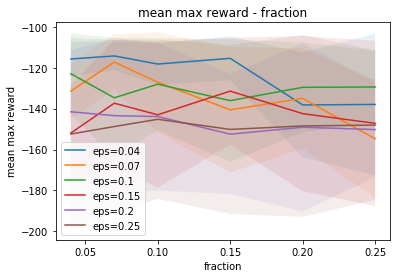

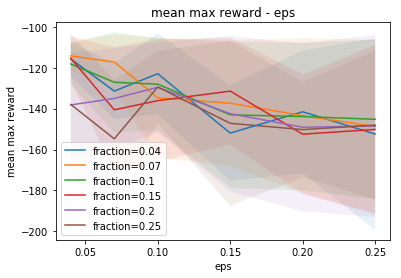

In [10]:
plot(data,'fraction','mean max reward','eps')
plot(data,'eps','mean max reward','fraction')





No handles with labels found to put in legend.


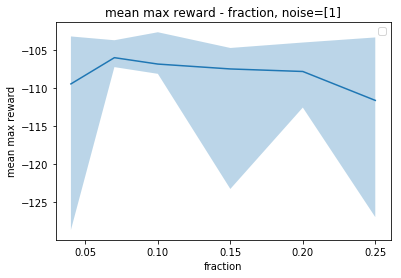

No handles with labels found to put in legend.


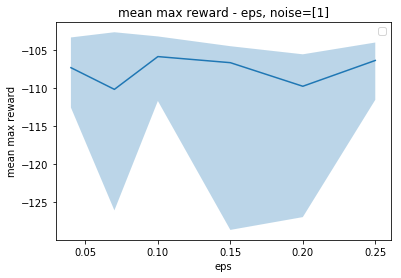

No handles with labels found to put in legend.


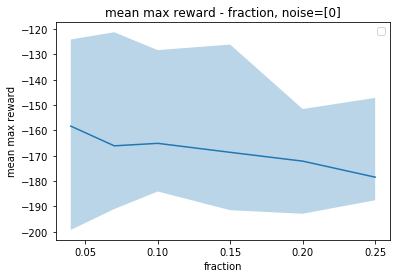

No handles with labels found to put in legend.


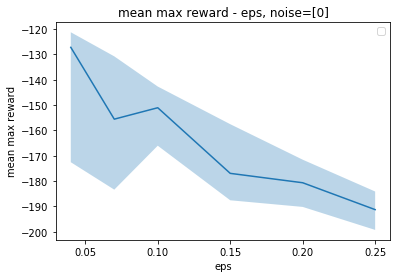

In [23]:
plot(data,'fraction','mean max reward',Filter={'noise':[1]})
plot(data,'eps','mean max reward',Filter={'noise':[1]})

plot(data,'fraction','mean max reward',Filter={'noise':[0]})
plot(data,'eps','mean max reward',Filter={'noise':[0]})




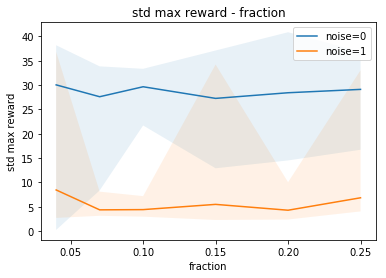

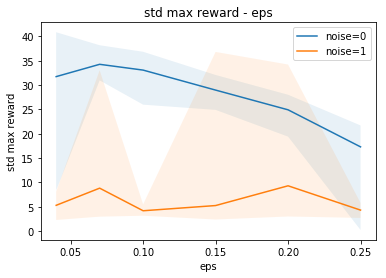

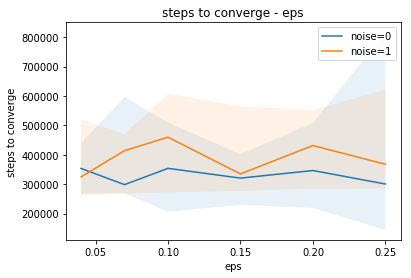

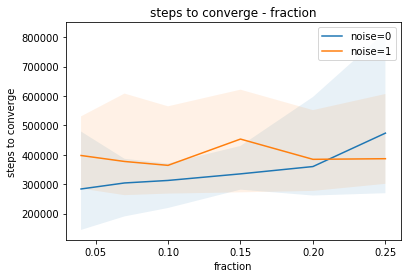

In [21]:
plot(data,'fraction','std max reward','noise')
plot(data,'eps','std max reward','noise')


plot(data,'eps','steps to converge','noise')
plot(data,'fraction','steps to converge','noise')





In [32]:
tentative_to_analyse=5
eps_to_analyse=0.04
fraction_to_analyse=0.1

In [33]:

filename='./log/mountaincar'
filename+='/'+str(eps_to_analyse)+'/'+str(fraction_to_analyse)
filename+='/'+'False/'+str(tentative_to_analyse)
filename+='/progress.csv'
without_noise = [l.split("\n")[0].split(",") for l in open(filename).readlines()]
count=0
for i in without_noise[0]:
    if i == 'mean 100 episode reward':
        index_mean=count
    elif i=="steps":
        index_steps=count
    count=count+1
# print('index mean = ' + str(index_mean))
# print('index steps = ' + str(index_steps))
without_noise = without_noise[1:]  # ignore the first line which is a string comment
# colum order q_max,q_min,episodes,mean 100 episode reward,steps,% time spent exploring
without_noise = np.array(without_noise)
# print(len(log))
steps = without_noise[:, index_steps].astype(np.float32)
mean_rew_100 = without_noise[:, index_mean].astype(np.float32)



In [34]:
filename='./log/mountaincar'
filename+='/'+str(eps_to_analyse)+'/'+str(fraction_to_analyse)
filename+='/'+'True/'+str(tentative_to_analyse)
filename+='/progress.csv'
with_noise = [l.split("\n")[0].split(",") for l in open(filename).readlines()]
count=0
for i in with_noise[0]:
    if i == 'mean 100 episode reward':
        index_mean=count
    elif i=="steps":
        index_steps=count
    count=count+1
# print('index mean = ' + str(index_mean))
# print('index steps = ' + str(index_steps))
with_noise = with_noise[1:]  # ignore the first line which is a string comment
# colum order q_max,q_min,episodes,mean 100 episode reward,steps,% time spent exploring
with_noise = np.array(with_noise)
# print(len(log))
steps_noise = with_noise[:, index_steps].astype(np.float32)
mean_rew_100_noise = with_noise[:, index_mean].astype(np.float32)



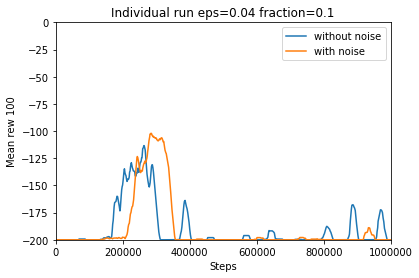

In [35]:
plt.figure()
plt.ylabel('Mean rew 100')
plt.xlabel('Steps')
plt.title('Individual run eps='+str(eps_to_analyse)+' fraction='+str(fraction_to_analyse))
plt.axis([0, np.max(steps), -200,0])
plt.plot(steps, mean_rew_100,label='without noise')
plt.plot(steps_noise,mean_rew_100_noise,label='with noise')
plt.legend()
plt.show()
# plt.savefig(os.path.join(root, d, str(tentative),'Evolution mean reward - steps.png'))
plt.close()